In [4]:
import pandas as pd
from os import listdir,environ
from sys import argv
from os.path import isfile,join
import os

In [6]:
root_dir = "/nrcan_p2"
data_dir = join(root_dir,"data")
geoscan_files_dir=join(data_dir,"01_raw","20201006","geoscan")
raw_dir=join(geoscan_files_dir,"raw")

In [10]:
onlyfiles = [f for f in listdir(raw_dir) if isfile(join(raw_dir, f))]

In [11]:
len(onlyfiles)

12056

In [26]:
def to_gb(size_in_bytes):
    return size_in_bytes / 1073741824

In [77]:
def print_mb_as_gbs(size_in_mbytes):
    return f'{size_in_mbytes/1024:.0f} GB'

In [24]:
files_by_size = dict()
files_by_size["filename"] = []
files_by_size["type"] = []
files_by_size["size_mb"] = []

for item in onlyfiles:
    files_by_size["filename"].append(item)
    files_by_size["type"].append(item.split(".")[-1])
    files_by_size["size_mb"].append(os.path.getsize(join(raw_dir,item))/1024/1024)
    

In [28]:
df= pd.DataFrame.from_dict(files_by_size)

In [29]:
df.head()

,filename,type,size_mb
0,407.zip,zip,0.381922
1,4680.pdf,pdf,3.051838
2,4681.pdf,pdf,14.446853
3,4682.pdf,pdf,20.091431
4,8273.pdf,pdf,17.314609


In [50]:
pdf_df = df[df["type"] == "pdf"].copy()

In [57]:
zip_df = df[df["type"] == "zip"].copy()

### PDF cound and size

In [58]:
pdf_df["size_mb"].count()

7183

In [78]:
print_mb_as_gbs(pdf_df["size_mb"].sum())

'119 GB'

### ZIP cound and size

In [60]:
zip_df["size_mb"].count()

4873

In [79]:
print_mb_as_gbs(zip_df["size_mb"].sum())

'566 GB'

<AxesSubplot:ylabel='Frequency'>

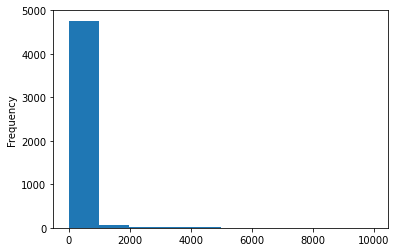

In [63]:
zip_df["size_mb"].plot.hist()

In [86]:
zip_more_then_1_gb=zip_df[zip_df["size_mb"] > 1000]["size_mb"]

In [87]:
zip_more_then_1_gb.count()

111

In [88]:
print_mb_as_gbs(zip_more_then_1_gb.sum())

'289 GB'

In [91]:
zip_more_then_100_mb_less_then_1_gb=zip_df[(zip_df["size_mb"] > 100) & (zip_df["size_mb"] < 1000)]["size_mb"]

In [94]:
zip_more_then_100_mb_less_then_1_gb.count()

667

In [93]:
print_mb_as_gbs(zip_more_then_100_mb_less_then_1_gb.sum())

'175 GB'

### Looking inside a zip file content

In [95]:
import zipfile

In [104]:
first_zip=zipfile.ZipFile(join(raw_dir,zip_df.iloc[0]["filename"]))

In [108]:
first_zip.namelist()

['OF 2916/ELBOW7W5',
 'OF 2916/FGAP9W5',
 'OF 2916/HARMA3W5',
 'OF 2916/HUNTE9W5',
 'OF 2916/INDEX',
 'OF 2916/JUMPI5W5',
 'OF 2916/OF2916_TEXT.WP',
 'OF 2916/OFR2916.xls',
 'OF 2916/OFRSW.TXT',
 'OF 2916/PANT10W5',
 'OF 2916/partialtext',
 'OF 2916/README.TXT',
 'OF 2916/README.WP',
 'OF 2916/SHEEP3W5',
 'OF 2916/STIMS4W5',
 'OF 2916/SULLI5W5',
 'OF 2916/TITLE.WP',
 'OF 2916/TURNE2W5']

In [133]:
with first_zip.open('OF 2916/INDEX') as f:
    print(f.read().decode('utf-8', 'ignore'))

Shell Elbow River 11-15-20-7W5              010315  300  .50
Camac Futurity Gap 16-17-24-9W5           30010640  300  .50
POC HARMATTAN EAST 7-19-33-3W5           710011190  100  .50
Shell West Hunter Valley 11-16-29-9W5    1400 6060  100  .50
CDR CPOG Jumpingpound Creek 7-4-25-5W5      012200  300  .50
Shell 6 Panther River 9-19-30-10W5       1200 6070  100  .50
Shell Home Sheep 5-29-18-3W5             1300 4990  100  .50
Gulf et al Stimson Creek 9-36-16-4W5      600 4625  100  .50
Shell Sullivan 6-15-18-5W5                400 4520  100  .50
PEX Turner Valley 16-14-18-2W5            800 3230  100  .50



In [119]:
with first_zip.open('OF 2916/README.TXT') as f:
    print(f.read().decode('utf-8', 'ignore'))

Copyright/Liability/Endorsement Statement. 

 The digital data supplied in this open file is under crown
copyright.  It is supplied on the understanding that it is for the
sole use of the purchaser, and will not be redistributed in any
form, in whole or in part, to third parties. The crown assumes no
liability for the data.  Any use and interpretation is solely the
responsibility of the purchaser.   Any references to proprietary
software in the documentation, and/or any use of proprietary data
formats in this release does not constitute endorsement by the GSC
of any manufacturer's product.  While an attempt will be made to
answer questions concerning the data, there is no guaranteed level
of support expressed or implied.   In accepting this software/data,
the purchaser undertakes to abide by the foregoing legal
requirements implicit in the purchase.



Format

Data and text are provided in both ASCII and Word Perferct  5.1
formats.  The reported parameters are as follows:

Depth:    In

In [121]:
with first_zip.open('OF 2916/OFRSW.TXT') as f:
    print(f.read().decode('utf-8', 'ignore'))

  Rock-Eval/TOC data for 10 southwest Alberta wells
(Townships 16 to 30 Ranges 2 to 10W5)

                             Lloyd R. Snowdon
    Geological Survey of Canada, 3303-33 Street N.W. Calgary, Alberta
                                 T2L 2A7
                            Project 890053/03
                                    
     Cuttings samples have been analyzed using a Rock-Eval/TOC
pyrolysis apparatus on a 30 foot or 10 metre spacing over the depth
intervals noted for the 10 wells listed below from the southern
Alberta foothills.  The samples are from the Geological Survey of
Canada archive set for Alberta wells and therefore a maximum of 100
mg of material is available for any depth.  Duplicate analyses
cannot be run if an instrument failure is suspected and thus the
data are presented in an unedited form and must be used with
caution.  Every effort is made to obtain a representative sample
from the vial of cuttings, but because of the small sample size,
mixed lithology sampl

In [123]:
join(raw_dir,zip_df.iloc[0]["filename"])

'/nrcan_p2/data/geoscan/raw/407.zip'